 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [15]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [17]:
whale_csv_path = Path("whale_returns.csv")
algo_csv_path = Path("algo_returns.csv")
sp_csv_path = Path("sp500_history.csv")

In [20]:
# Reading whale returns
whale_portfolio = pd.read_csv(whale_csv_path, parse_dates=True, infer_datetime_format=True)

In [21]:
# Count nulls
whale_portfolio.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [22]:
# Drop nulls
whale_portfolio = whale_portfolio.dropna().copy()

In [23]:
whale_portfolio['Date'] = pd.to_datetime(whale_portfolio['Date'])

In [24]:
whale_portfolio = whale_portfolio.set_index('Date')
whale_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [25]:
# Reading algorithmic returns
algo_portfolio_path = Path("algo_returns.csv")

algo_portfolio = pd.read_csv(algo_portfolio_path, parse_dates = True, infer_datetime_format=True)

In [26]:
# Count nulls
algo_portfolio.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [27]:
# Drop nulls
algo_portfolio = algo_portfolio.dropna().copy()

In [28]:
algo_portfolio['Date'] = pd.to_datetime(algo_portfolio['Date'])
algo_portfolio = algo_portfolio.set_index('Date')
algo_portfolio.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [29]:
# Reading S&P 500 Closing Prices
sp_portfolio_path = Path("sp500_history.csv")
sp_portfolio = pd.read_csv(sp_portfolio_path, parse_dates= True, infer_datetime_format=True)

In [30]:
# Check Data Types
sp_portfolio.dtypes

Date     object
Close    object
dtype: object

In [31]:
sp_portfolio.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [32]:
# Fix Data Types
sp_portfolio['Close'] = sp_portfolio['Close'].str.replace('$','').str.replace(',','')
sp_portfolio['Close'] = sp_portfolio['Close'].astype(float)

sp_portfolio['Date'] = pd.to_datetime(sp_portfolio['Date'])

C:\Users\tjwen\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [33]:
# Calculate Daily Returns
sp_portfolio = sp_portfolio.set_index('Date')

In [34]:
# Drop nulls
sp_portfolio = sp_portfolio.pct_change().dropna().copy()
sp_portfolio.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [35]:
# Rename `Close` Column to be specific to this portfolio.
sp_portfolio = sp_portfolio.rename(columns = {'Close': 'S&P'})
sp_portfolio.head()

,S&P
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [36]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns_daily = pd.concat([whale_portfolio, algo_portfolio, sp_portfolio], axis=1, join="inner")
all_returns_daily.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

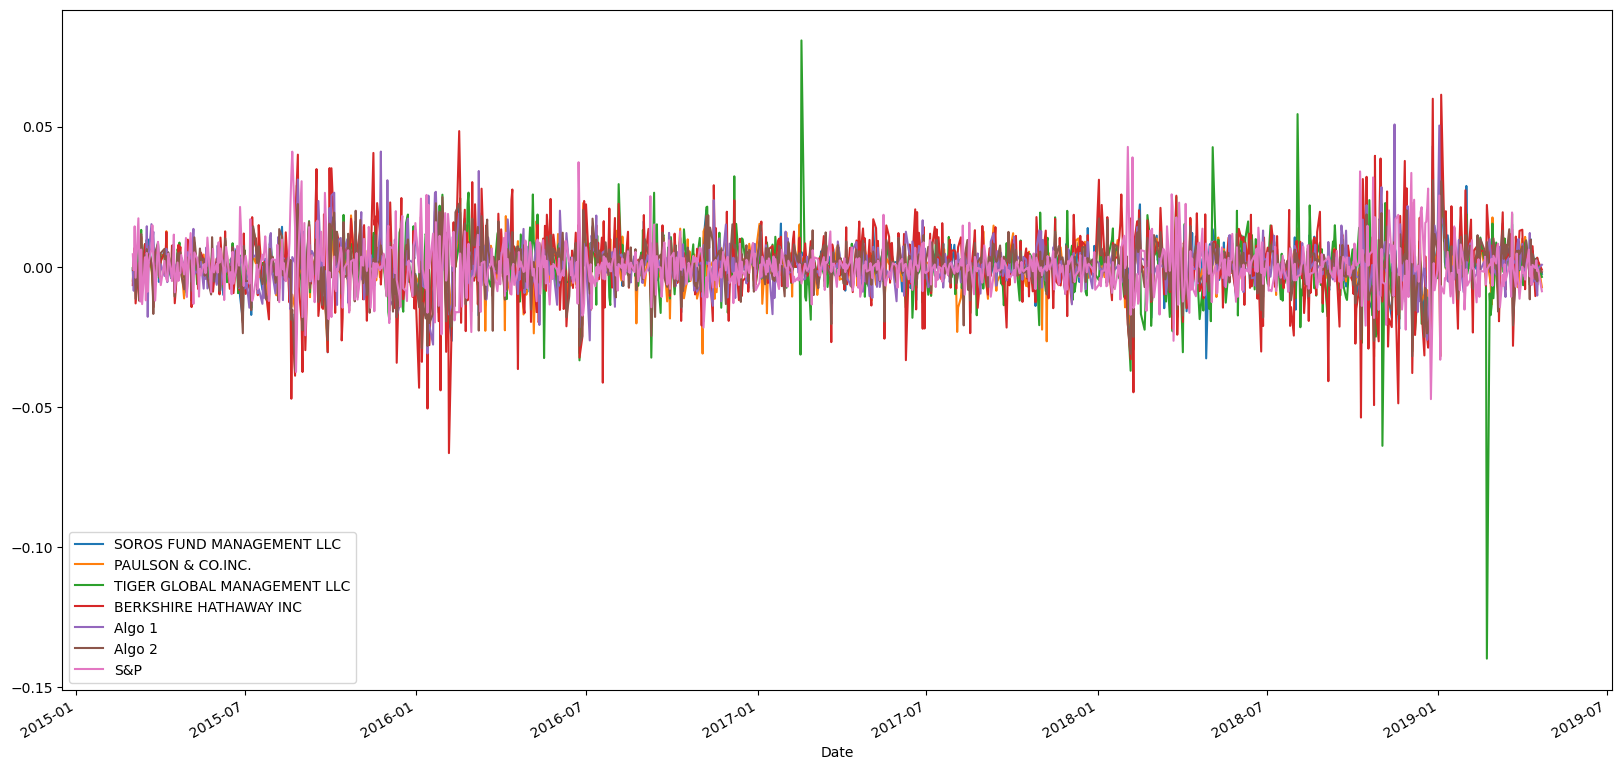

In [37]:
# Plot daily returns of all portfolios
all_returns_daily.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

In [84]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns_daily).cumprod()
cumulative_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123
2015-03-10,0.987379,0.997595,0.984595,0.979897,0.976921,0.983462,1.033104
2015-03-11,0.991340,1.002746,0.987855,0.978774,0.979846,0.984056,1.020247
2015-03-12,0.999533,1.013045,1.000813,0.989346,0.976971,0.995537,1.026483
2015-03-13,0.997037,1.011598,0.997113,0.981290,0.971673,0.990498,1.012776


<AxesSubplot:xlabel='Date'>

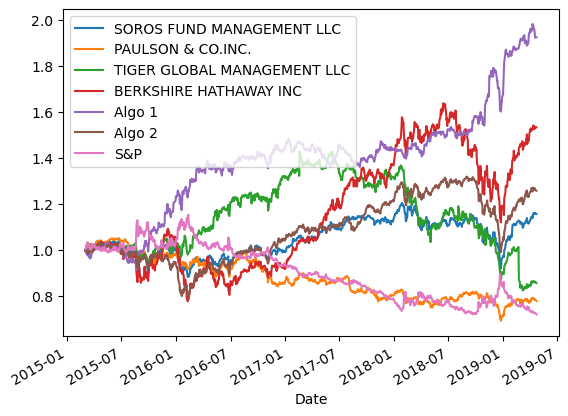

In [39]:
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

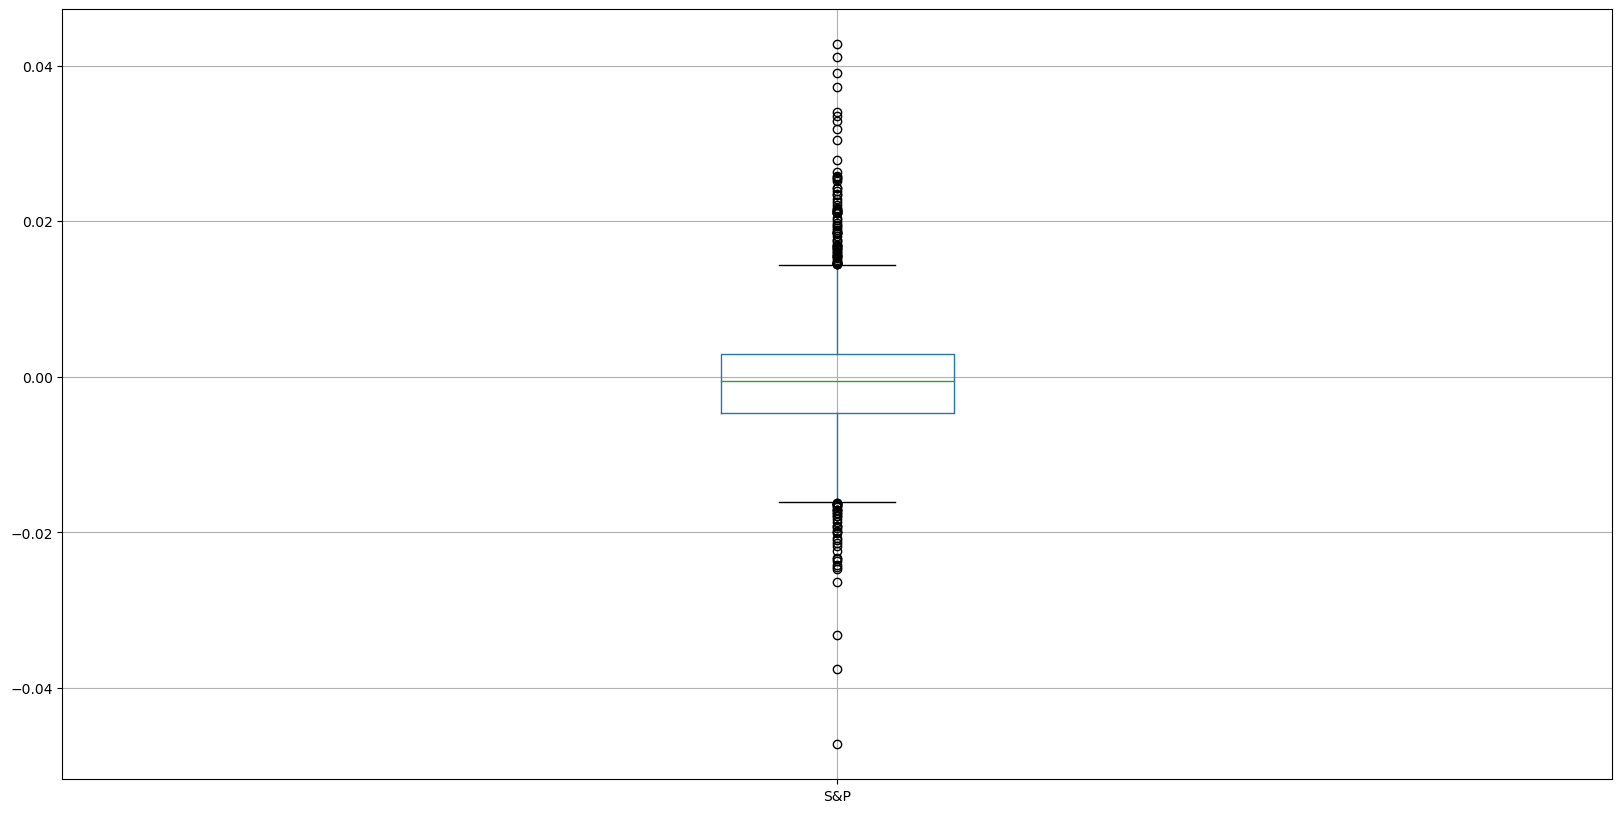

In [40]:
# Box plot to visually show risk
sp_portfolio.boxplot(figsize=(20, 10))

<AxesSubplot:>

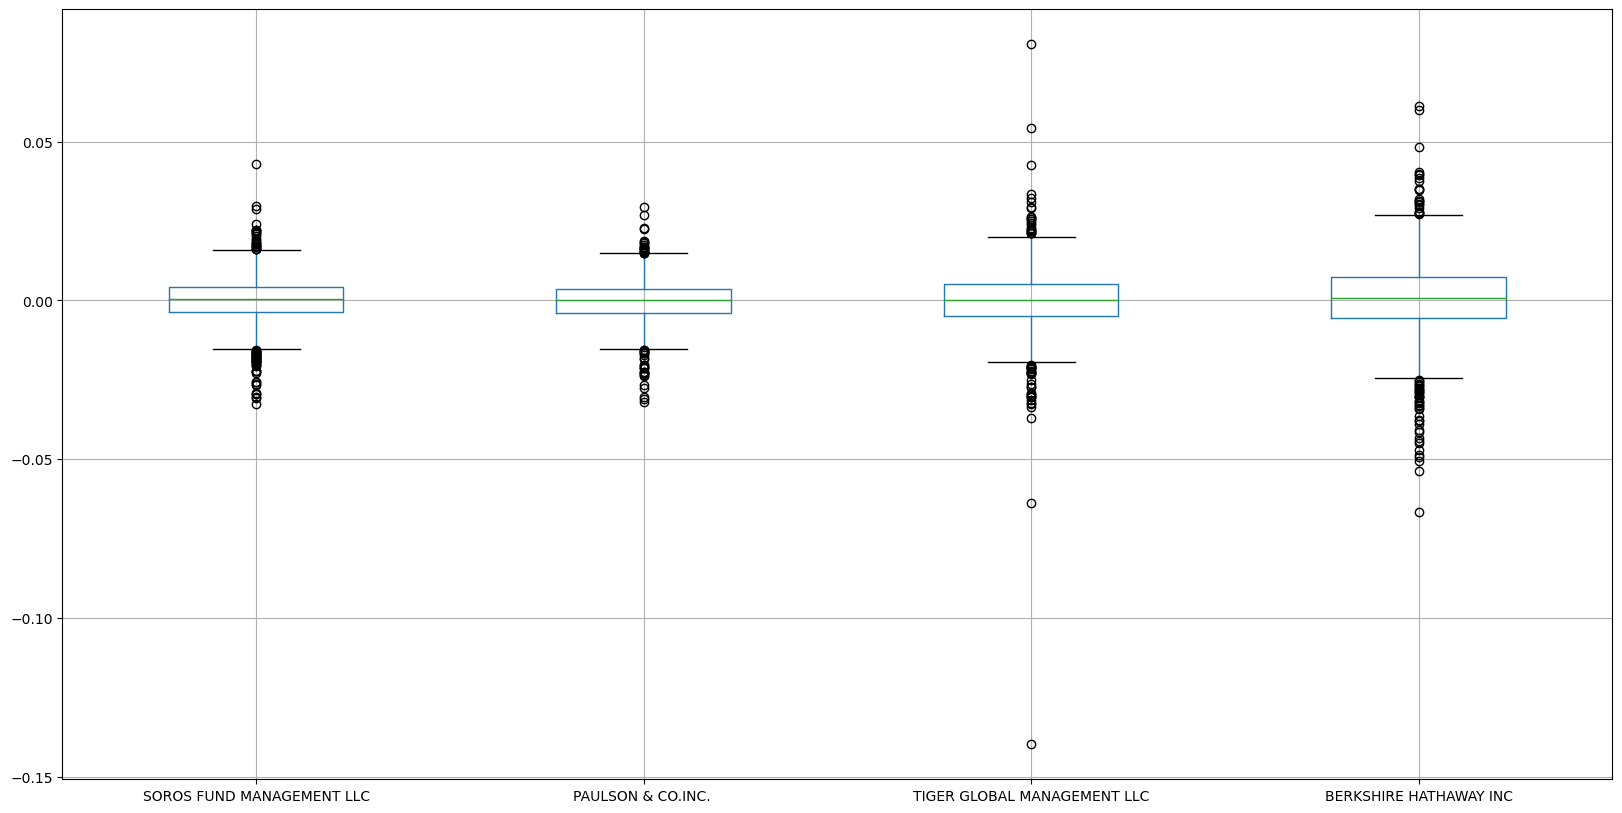

In [45]:
whale_portfolio.boxplot(figsize=(20, 10))

<AxesSubplot:>

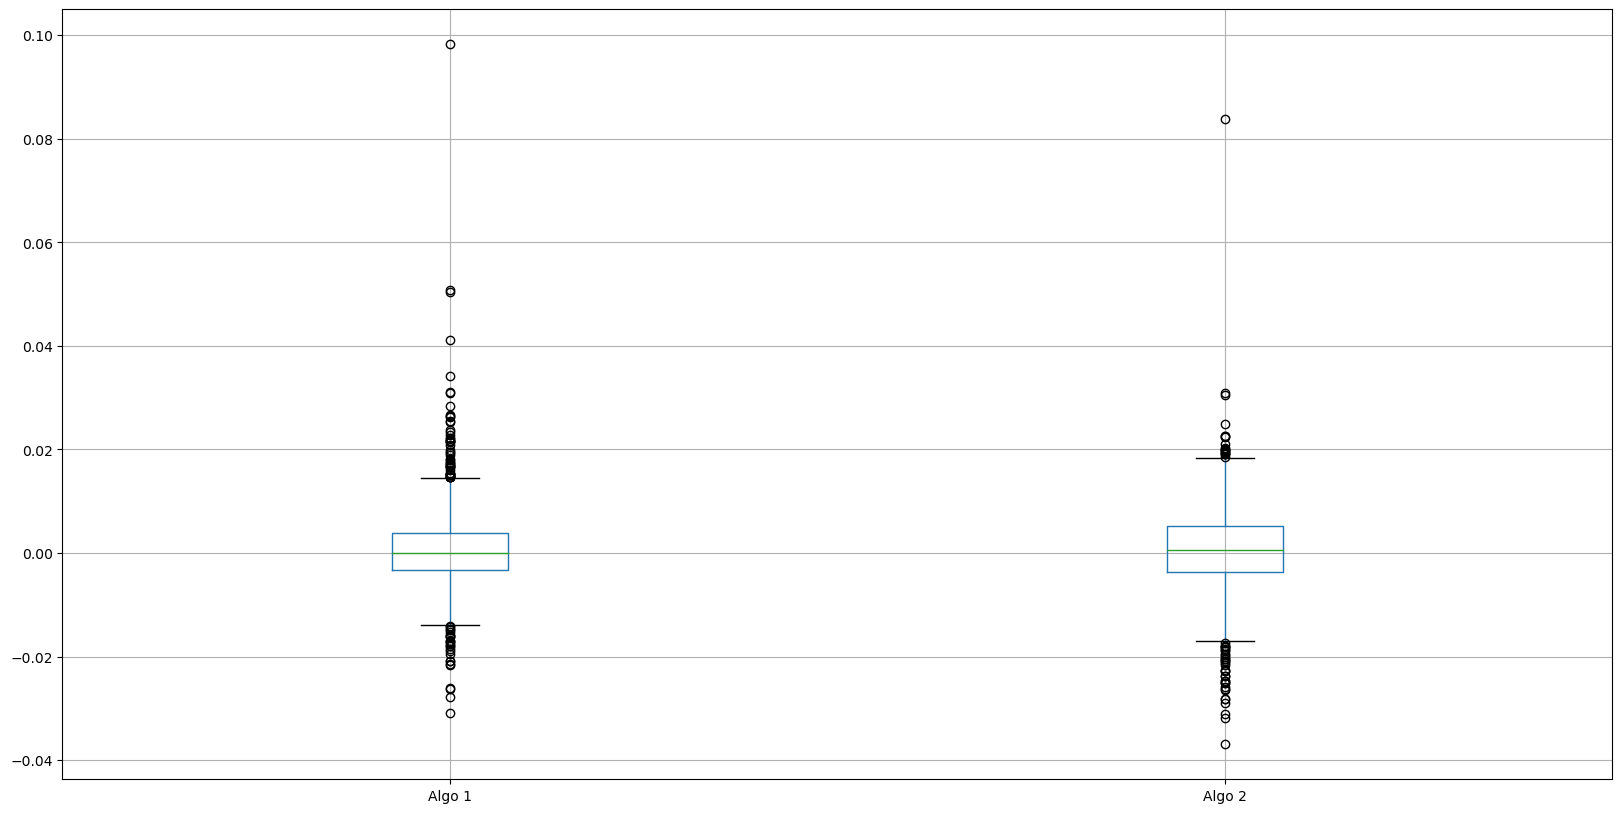

In [46]:
algo_portfolio.boxplot(figsize=(20, 10))

### Calculate Standard Deviations

In [60]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_std = all_returns_daily.std()
all_portfolio_std.head(10)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P                            0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [64]:
# Calculate  the daily standard deviation of S&P 500
sp_portfolio_std = sp_portfolio.std()
sp_portfolio_std.head()

S&P    0.008135
dtype: float64

In [62]:
# Determine which portfolios are riskier than the S&P 500
algo_portfolio_std = algo_portfolio.std()
algo_portfolio_std.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [63]:
whale_portfolio_std = whale_portfolio.std()
whale_portfolio_std.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

### Calculate the Annualized Standard Deviation

In [66]:
# Calculate the annualized standard deviation (252 trading days)
annualised_std = all_portfolio_std*np.sqrt(252)
annualised_std.head(7)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P                            0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

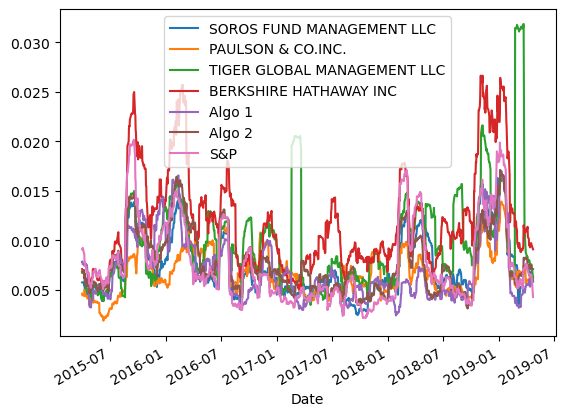

In [68]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_returns_daily.rolling(window=21).std()
# Plot the rolling standard deviation
all_returns_daily.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [69]:
# Calculate the correlation
price_correlation = all_returns_daily.corr()
price_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


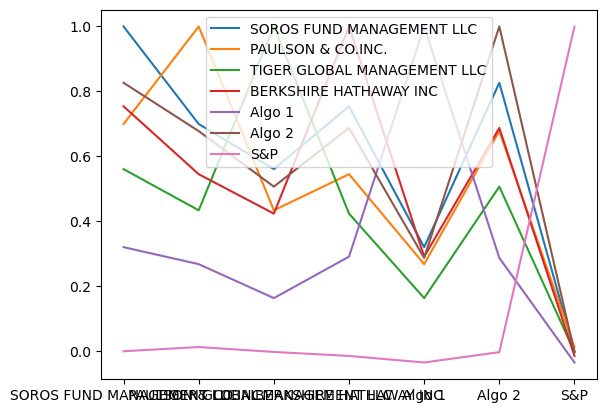

In [70]:
# Display de correlation matrix
price_correlation = all_returns_daily.corr().plot()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [71]:
# Calculate covariance of a single portfolio
SFM_covariance = whale_portfolio['SOROS FUND MANAGEMENT LLC'].cov(sp_portfolio['S&P'])
SFM_covariance

3.8897269830622025e-08

In [72]:
# Calculate variance of S&P 500
variance = sp_portfolio['S&P'].var()
variance

6.617241051948298e-05

In [73]:
# Computing beta
SFM_beta = SFM_covariance / variance
SFM_beta

0.0005878170301680275

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Soros Returns vs. S&P 500 Returns'}, xlabel='Date'>

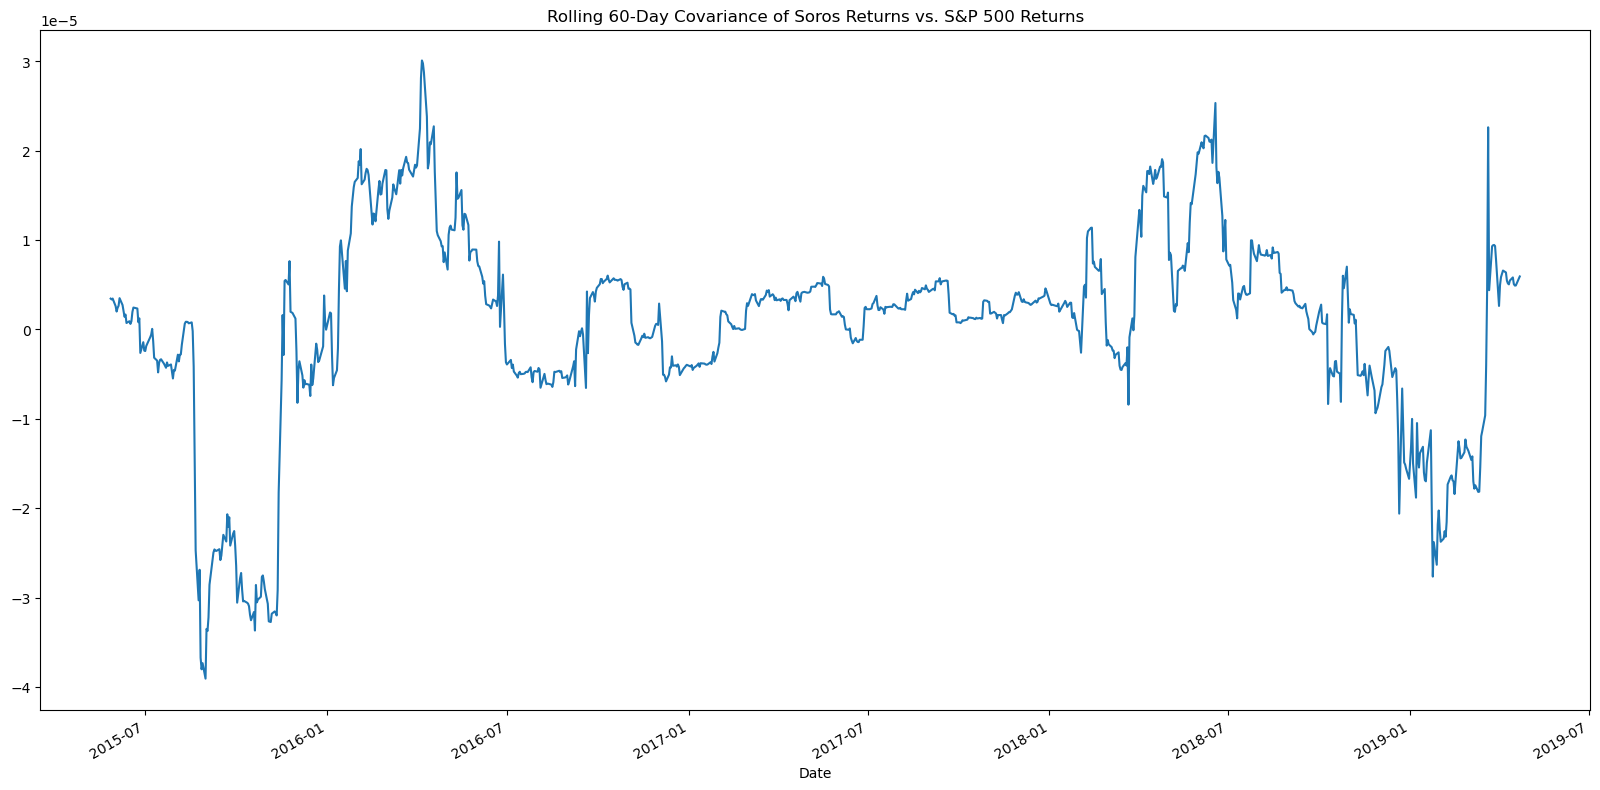

In [74]:
# Plot beta trend
rolling_covariance = all_returns_daily['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(all_returns_daily['S&P'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Soros Returns vs. S&P 500 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [81]:
# Use `ewm` to calculate the rolling window
all_returns_ewm = all_returns_daily.std()


all_returns_daily.ewm(halflife='21 days', axis=1, times=pd.DatetimeIndex(times)).std()

NameError: name 'times' is not defined

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [82]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_returns_daily.mean() * 252) / (all_returns_daily.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P                           -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

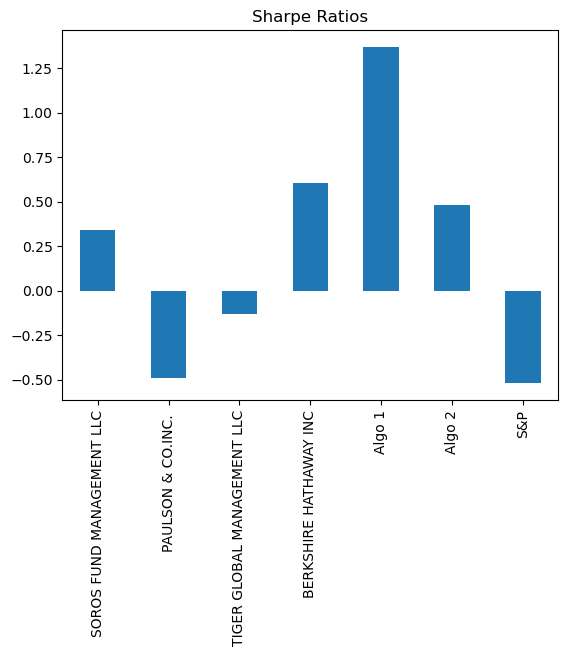

In [83]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [89]:
# Reading data from 1st stock
csv_path = Path("cost_historical.csv")
cost_historical_df = pd.read_csv(csv_path)
pd.read_csv(csv_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cost_historical_df = cost_historical_df.set_index("Trade DATE")
cost_historical_df.head()

,Symbol,NOCP
Trade DATE,,
5/9/2019,COST,243.47
5/8/2019,COST,241.34
5/7/2019,COST,240.18
5/6/2019,COST,244.23
5/3/2019,COST,244.62


In [90]:
# Reading data from 2nd stock
csv_path = Path("aapl_historical.csv")
aapl_historical_df = pd.read_csv(csv_path)
pd.read_csv(csv_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
aapl_historical_df = aapl_historical_df.set_index("Trade DATE")
aapl_historical_df.head()

,Symbol,NOCP
Trade DATE,,
5/9/2019,AAPL,200.72
5/8/2019,AAPL,202.90
5/7/2019,AAPL,202.86
5/6/2019,AAPL,208.48
5/3/2019,AAPL,211.75


In [91]:
# Reading data from 3rd stock
csv_path = Path("goog_historical.csv")
goog_historical_df = pd.read_csv(csv_path)
pd.read_csv(csv_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
goog_historical_df = goog_historical_df.set_index("Trade DATE")
goog_historical_df.head()

,Symbol,NOCP
Trade DATE,,
5/9/2019,GOOG,1162.38
5/8/2019,GOOG,1166.27
5/7/2019,GOOG,1174.10
5/6/2019,GOOG,1189.39
5/3/2019,GOOG,1185.40


In [93]:
# Combine all stocks in a single DataFrame
all_combined_df = pd.concat([cost_historical_df, aapl_historical_df, goog_historical_df], axis="rows", join="inner")
all_combined_df = all_combined_df.reset_index()
all_combined_df = all_combined_df.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
all_combined_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
1/10/2019,153.80,210.64,1070.33
1/11/2019,152.29,210.51,1057.19
1/14/2019,150.00,209.00,1044.69
1/15/2019,153.07,211.03,1077.15
1/16/2019,154.94,210.18,1080.97


In [108]:
# Reset Date index
all_combined_df.index = pd.to_datetime(all_combined_df.index)
all_combined_df.reset_index

<bound method DataFrame.reset_index of Symbol        AAPL    COST     GOOG
Trade DATE                         
2019-01-10  153.80  210.64  1070.33
2019-01-11  152.29  210.51  1057.19
2019-01-14  150.00  209.00  1044.69
2019-01-15  153.07  211.03  1077.15
2019-01-16  154.94  210.18  1080.97
...            ...     ...      ...
2018-09-28  225.74  234.88  1193.47
2018-09-04  228.36  234.68  1197.00
2018-09-05  226.87  235.61  1186.48
2018-09-06  223.10  236.68  1171.44
2018-09-07  221.30  241.46  1164.83

[250 rows x 3 columns]>

In [109]:
# Reorganize portfolio data by having a column per symbol
all_combined_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2019-01-10,153.80,210.64,1070.33
2019-01-11,152.29,210.51,1057.19
2019-01-14,150.00,209.00,1044.69
2019-01-15,153.07,211.03,1077.15
2019-01-16,154.94,210.18,1080.97


In [110]:
# Calculate daily returns

# Drop NAs
all_returns = all_combined_df.pct_change().dropna().copy()
# Display sample data

all_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2019-01-11,-0.009818,-0.000617,-0.012277
2019-01-14,-0.015037,-0.007173,-0.011824
2019-01-15,0.020467,0.009713,0.031071
2019-01-16,0.012217,-0.004028,0.003546
2019-01-17,0.005938,0.006090,0.008261


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [111]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = all_returns.dot(weights)
# Display sample data
portfolio_returns.head()

Trade DATE
2019-01-11   -0.007571
2019-01-14   -0.011345
2019-01-15    0.020417
2019-01-16    0.003912
2019-01-17    0.006763
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [113]:
# Join your returns DataFrame to the original returns DataFrame
combined_df = pd.concat([all_combined_df, all_returns_daily], axis="columns", join="inner")
                       
combined_df.tail(10)

,AAPL,COST,GOOG,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
2018-09-21,217.66,234.76,1166.09,-0.001724,-0.000370,-0.006489,-0.001485,-0.004860,-0.003114,0.003528
2018-09-24,220.79,233.34,1173.37,-0.007073,-0.005287,-0.011071,-0.003209,0.012860,-0.003643,0.001307
2018-09-25,222.19,232.93,1184.65,-0.002419,-0.003653,-0.011874,0.004900,0.001993,0.000332,0.003300
2018-09-26,220.42,233.81,1180.49,-0.005043,-0.002545,-0.006773,0.007576,0.001034,-0.003170,-0.002756
2018-09-27,224.95,234.00,1194.64,0.003527,0.003482,-0.001143,0.005109,0.003262,-0.001825,0.000007
2018-09-28,225.74,234.88,1193.47,0.002186,0.002045,-0.001476,-0.002684,-0.000192,-0.001975,-0.003628
2018-09-04,228.36,234.68,1197.00,-0.001579,-0.004159,-0.017688,-0.014065,-0.000860,-0.002850,0.002811
2018-09-05,226.87,235.61,1186.48,-0.006677,-0.001899,0.000307,-0.040847,0.008809,-0.003619,0.003666
2018-09-06,223.10,236.68,1171.44,-0.008370,-0.004373,-0.002911,-0.003522,0.005272,-0.006841,0.002218
2018-09-07,221.30,241.46,1164.83,0.002157,-0.000862,-0.003003,0.002303,-0.002163,-0.001500,-0.001894


In [114]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df.sort_index
combined_df.dropna(inplace=True)
combined_df.head()

,AAPL,COST,GOOG,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
2019-01-10,153.80,210.64,1070.33,0.002869,-0.000388,0.007423,0.003163,0.003087,0.003366,0.000146
2019-01-11,152.29,210.51,1057.19,0.011190,0.004232,0.002051,-0.002152,-0.005112,0.003885,0.005285
2019-01-14,150.00,209.00,1044.69,-0.001999,-0.005161,0.007798,-0.001253,-0.005642,-0.006659,-0.010608
2019-01-15,153.07,211.03,1077.15,0.006397,0.002851,0.012879,0.021566,0.000369,0.007277,-0.002217
2019-01-16,154.94,210.18,1080.97,0.004426,0.000646,0.005657,0.004354,-0.001423,0.004469,-0.007534


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [115]:
# Calculate the annualized `std`
annualized_std = combined_df.std() * np.sqrt(252)
annualized_std.head()

AAPL                          345.112320
COST                          219.950141
GOOG                         1055.438182
SOROS FUND MANAGEMENT LLC       0.146589
PAULSON & CO.INC.               0.116683
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

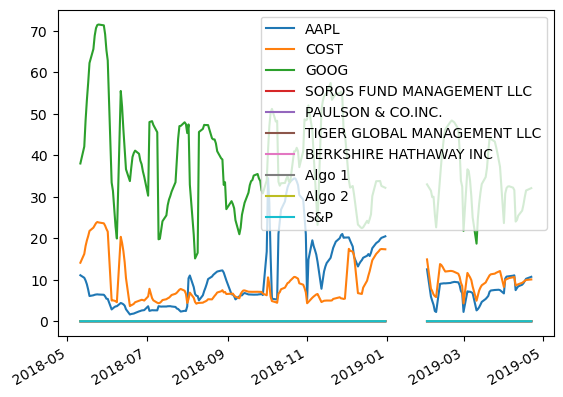

In [116]:
# Calculate rolling standard deviation
combined_df.rolling(window=21).std()
# Plot rolling standard deviation
combined_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

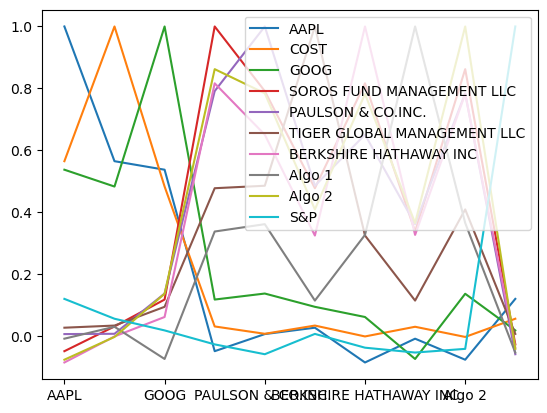

In [117]:
# Calculate and plot the correlation
combined_df.correlation = combined_df.corr().plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [125]:
# Calculate and plot Beta
covariance2 = combined_df['COST'].cov(combined_df['S&P'])
covariance2

0.00728586668312965

In [126]:
variance2 = combined_df['S&P'].var()
variance2

9.185941770085176e-05

In [127]:
Cost_beta = covariance2 / variance2
Cost_beta

79.31540244307571

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Cost vs. S&P 500 Returns'}>

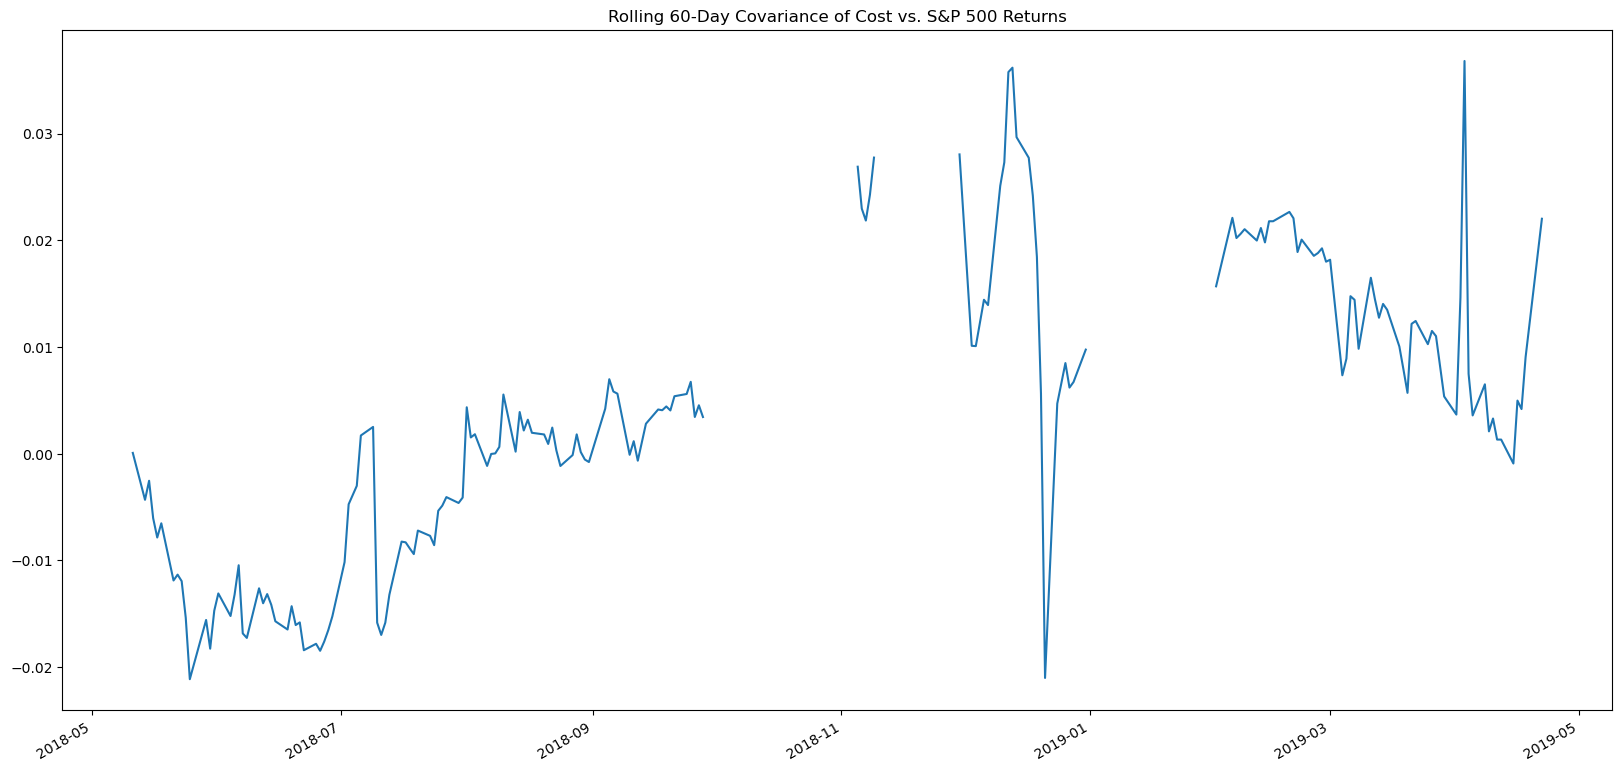

In [129]:
rolling_covariance = combined_df['COST'].rolling(window=60).cov(combined_df['S&P'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Cost vs. S&P 500 Returns')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [130]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios2 = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios2

AAPL                           139.440063
COST                           253.103446
GOOG                           270.571954
SOROS FUND MANAGEMENT LLC        0.344766
PAULSON & CO.INC.                0.236041
TIGER GLOBAL MANAGEMENT LLC     -1.052249
BERKSHIRE HATHAWAY INC           0.085005
Algo 1                           1.999866
Algo 2                           0.009467
S&P                             -0.432942
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

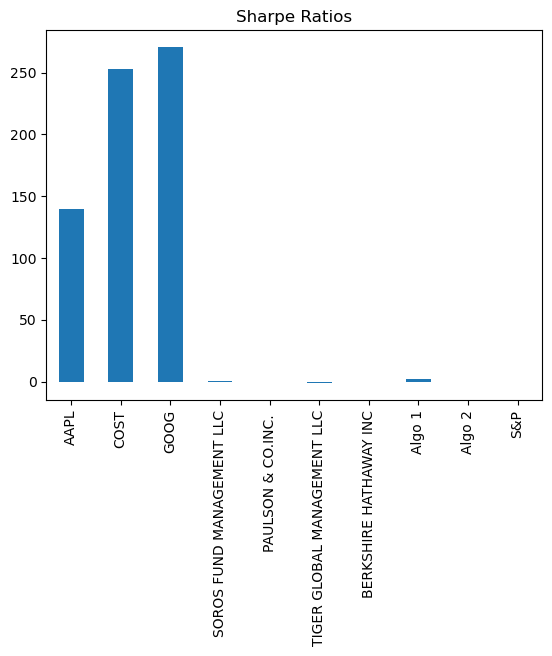

In [131]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot.bar(title="Sharpe Ratios")